This notebook attempts to solve the following problem:  A thin rod of length L1 = 1.5 m lies along the positive x-axis with one end at the origin. A second thin rod of length L2 = 1.9 m lies along the positive x-axis with the left end a distance a = 1.9 m to the right of the first rod (refer to the figure). Both rods carry uniformly distributed charges with Q1 = 6.6 μC on the first rod and Q2 = 18.2 μC on the second rod.

Calculate the magnitude of the total force, in Newtons, on the second rod due to the total charge on the first rod.  We also wish to compare this force to that calculated by assuming that the charges are point charges, as a function of the distance, a, between the two rods.

The expression for the force, using calculus, is:

F12_exact = k*Q1*Q2*log((a*L1)(a+L2)/((a)(a+L1+L2)))

The expression fo the the force assuming point charges at the centre of each rod is:

F12_pt_charge = k*Q2*Q2/(a+L1/2+L2/2)^2 

We begin by importing the appropriate plotting and mathematical libraries.

In [1]:
import math
import matplotlib.pyplot as plt

Next, we define the appropriate values, along with lists which will contain the separation, a, and the percentage difference between the exact and point charge solutions.

In [2]:
ke = 8.99E+09
q1 = 6.6E-06
q2 = 18.2E-06

l1 = 1.5
l2 = 1.9
pdiff = [0 for i in range(0,1000)]
a = [0 for i in range(0,1000)]

Now, we loop over separations from the initial value specified in the problem up to some rather large separation.  AT each step, we calculate the two values of the force (exact and point charge), and the percentage difference between them.

In [3]:
for i in range(0,1000):
    a[i] = 1.9+i*0.1

    fraction = (a[i]+l1)*(a[i]+l2)/((a[i])*(a[i]+l1+l2))
    f12 = ke*q1*q2*math.log(fraction)/(l1*l2)
    f12_pt_charge = ke*q1*q2/((a[i]+l1/2+l2/2)*(a[i]+l1/2+l2/2))

    pdiff[i] = abs((f12-f12_pt_charge)/f12)
    if i == 0:
        print ("a = %5.3f" % a[i]," Force = %5.3f" % f12," Force_pointcharge = %5.3f" % f12_pt_charge," Difference = %5.3f" % pdiff[i])

a = 1.900  Force = 0.094  Force_pointcharge = 0.083  Difference = 0.118


Finally, we plot the results.

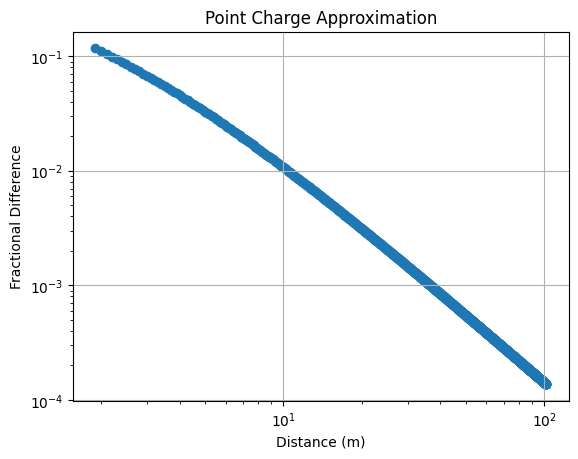

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title("Point Charge Approximation")
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Fractional Difference')
ax1.grid(True)
ax1.set_yscale("log")
ax1.set_xscale("log")

ax1.scatter(a,pdiff)

plt.show()